# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Encoding Categorical Variables**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/KU-17_B01_Kandy_Uni/results/outputs/survey_scaled.csv')

In [5]:
df.head()

,Timestamp,Age,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Gender_Clean,Age_standardized
0,2014-08-27 11:29:31,37,United States,Unknown,No,Yes,Often,6-25,No,Yes,...,No,No,Some of them,Yes,No,Maybe,Yes,No,female,0.675640
1,2014-08-27 11:29:37,44,United States,Unknown,No,No,Rarely,More than 1000,No,No,...,Maybe,No,No,No,No,No,Don't know,No,male,1.625171
2,2014-08-27 11:29:44,32,Canada,Unknown,No,No,Rarely,6-25,No,Yes,...,No,No,Yes,Yes,Yes,Yes,No,No,male,-0.002596
3,2014-08-27 11:29:46,31,United Kingdom,Unknown,Yes,Yes,Often,26-100,No,Yes,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,male,-0.138243
4,2014-08-27 11:30:22,31,United States,Unknown,No,No,Never,100-500,Yes,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,male,-0.138243


In [6]:
# df_encoded = df.copy()

In [7]:
# country_counts = df['Country'].value_counts()
# country_counts


In [8]:
# Group rare countries on the copied dataframe used later (df)
country_counts = df['Country'].fillna('Unknown').value_counts()
rare_threshold = 10
rare_countries = country_counts[country_counts < rare_threshold].index.tolist()
df['Country'] = df['Country'].fillna('Unknown').replace(rare_countries, 'Other')
print("Country value counts after grouping rare countries (df):")
print(df['Country'].value_counts().head(20))

Country value counts after grouping rare countries (df):
Country
United States     748
United Kingdom    184
Other             107
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
Name: count, dtype: int64


In [9]:
for cols in df.columns:
  print(f"{cols}: {df[cols].unique()}")

Timestamp: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Age: [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]
Country: ['United States' 'Canada' 'United Kingdom' 'Other' 'France' 'Netherlands'
 'Australia' 'Germany' 'Ireland' 'India']
self_employed: ['Unknown' 'Yes' 'No']
family_history: ['No' 'Yes']
treatment: ['Yes' 'No']
work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' 'Unknown']
no_employees: ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
remote_work: ['No' 'Yes']
tech_company: ['Yes' 'No']
benefits: ['Yes' "Don't know" 'No']
care_options: ['Not sure' 'No' 'Yes']
wellness_program: ['No' "Don't know" 'Yes']
seek_help: ['Yes' "Don't know" 'No']
anonymity: ['Yes' "Don't know" 'No']
leave: ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
mental_

In [10]:
binary_cols = [
    "family_history", "treatment", "remote_work", "tech_company", "obs_consequence"
]
# lowercase keys to match .str.lower() below
binary_map = {'yes': 1, 'no': 0}
mappings = {}

for c in binary_cols:
    if c in df.columns:
        # make string, lowercase, strip; then map; unknowns get -1
        df[c] = df[c].fillna('Unknown').astype(str).str.strip().str.lower().map(binary_map).fillna(-1).astype(int)
        mappings[c] = {'Yes': 1, 'No': 0, 'Unknown': -1}
    else:
        print(f"Note: binary column '{c}' not found, skipping.")




In [11]:
# ---- Ordinal mappings (explicit dicts) ----
# Provide the expected orders (edit if you have different labels)
work_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Unknown': -1}
no_emp_map = {
    '1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000': 4,
    'More than 1000': 5, 'Unknown': -1
}
leave_map = {
    'Very difficult': 0, 'Somewhat difficult': 1, 'Somewhat easy': 2, 'Very easy': 3, 'Don\'t know': -1, 'Unknown': -1
}

In [12]:
# Apply work_interfere
if 'work_interfere' in df.columns:
    df['work_interfere'] = df['work_interfere'].fillna('Unknown').astype(str).map(
        lambda v: work_map.get(v, work_map.get(v.title(), -1))
    ).astype(int)
    mappings['work_interfere'] = work_map
else:
    print("Note: 'work_interfere' not found, skipping.")

# Apply no_employees
if 'no_employees' in df.columns:
    df['no_employees'] = df['no_employees'].fillna('Unknown').astype(str).map(
        lambda v: no_emp_map.get(v, no_emp_map.get(v.title(), -1))
    ).astype(int)
    mappings['no_employees'] = no_emp_map
else:
    print("Note: 'no_employees' not found, skipping.")

# Apply leave
if 'leave' in df.columns:
    df['leave'] = df['leave'].fillna('Unknown').astype(str).map(
        lambda v: leave_map.get(v, leave_map.get(v.title(), -1))
    ).astype(int)
    mappings['leave'] = leave_map
else:
    print("Note: 'leave' not found, skipping.")


In [13]:
three_map = {'no': 0, 'maybe': 1, 'yes': 2, 'unknown': -1}
three_level_cols = [
    "mental_health_consequence", "phys_health_consequence",
    "mental_health_interview", "phys_health_interview"
]
for c in three_level_cols:
    if c in df.columns:
        df[c] = df[c].fillna('Unknown').astype(str).str.strip().str.lower().map(three_map).fillna(-1).astype(int)
        mappings[c] = {'No': 0, 'Maybe': 1, 'Yes': 2, 'Unknown': -1}
    else:
        print(f"Note: three-level column '{c}' not found, skipping.")

In [14]:
sot_map = {'no': 0, 'some of them': 1, 'yes': 2, 'unknown': -1}
for c in ['coworkers', 'supervisor']:
    if c in df.columns:
        df[c] = df[c].fillna('Unknown').astype(str).str.strip().str.lower().map(sot_map).fillna(-1).astype(int)
        mappings[c] = {'No': 0, 'Some of them': 1, 'Yes': 2, 'Unknown': -1}
    else:
        print(f"Note: '{c}' not found, skipping.")

In [15]:
one_hot_cols = [
    "Country", "self_employed", "benefits", "care_options",
    "wellness_program", "seek_help", "anonymity", "mental_vs_physical",
    "Gender_Clean"
]
one_hot_present = [c for c in one_hot_cols if c in df.columns]
if one_hot_present:
    for c in one_hot_present:
        df[c] = df[c].fillna('Unknown').astype(str)
    df = pd.get_dummies(df, columns=one_hot_present, drop_first=False)
    print("One-hot encoded:", one_hot_present)
else:
    print("No one-hot nominal columns found, skipping get_dummies.")

One-hot encoded: ['Country', 'self_employed', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'mental_vs_physical', 'Gender_Clean']


In [16]:
df.to_csv('/content/drive/MyDrive/KU-17_B01_Kandy_Uni/results/outputs/survey_encoded.csv', index=False)

In [17]:
df.shape

(1254, 51)

In [18]:
for cols in df.columns:
  print(f"{cols}: {df[cols].unique()}")


Timestamp: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Age: [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]
family_history: [0 1]
treatment: [1 0]
work_interfere: [ 3  1  0  2 -1]
no_employees: [1 5 2 3 0 4]
remote_work: [0 1]
tech_company: [1 0]
leave: [ 2 -1  1  0  3]
mental_health_consequence: [0 1 2]
phys_health_consequence: [0 2 1]
coworkers: [1 0 2]
supervisor: [2 0 1]
mental_health_interview: [0 2 1]
phys_health_interview: [1 0 2]
obs_consequence: [0 1]
Age_standardized: [ 6.75640030e-01  1.62517064e+00 -2.59611923e-03 -1.38243349e-01
  1.33051111e-01  4.04345570e-01  9.46934490e-01  1.35387618e+00
 -1.22342119e+00 -4.09537809e-01  5.39992800e-01 -6.80832269e-01
  1.89646510e+00  1.21822895e+00  2.68698340e-01 -2.73890579e-01
  1.08258172e+00  8.11287260e-01  2.43905402e+00 -1.08777396e+0

In [19]:
for cols in df.columns:
  print(f"{cols}: {df[cols].nunique()}")

Timestamp: 1242
Age: 48
family_history: 2
treatment: 2
work_interfere: 5
no_employees: 6
remote_work: 2
tech_company: 2
leave: 5
mental_health_consequence: 3
phys_health_consequence: 3
coworkers: 3
supervisor: 3
mental_health_interview: 3
phys_health_interview: 3
obs_consequence: 2
Age_standardized: 48
Country_Australia: 2
Country_Canada: 2
Country_France: 2
Country_Germany: 2
Country_India: 2
Country_Ireland: 2
Country_Netherlands: 2
Country_Other: 2
Country_United Kingdom: 2
Country_United States: 2
self_employed_No: 2
self_employed_Unknown: 2
self_employed_Yes: 2
benefits_Don't know: 2
benefits_No: 2
benefits_Yes: 2
care_options_No: 2
care_options_Not sure: 2
care_options_Yes: 2
wellness_program_Don't know: 2
wellness_program_No: 2
wellness_program_Yes: 2
seek_help_Don't know: 2
seek_help_No: 2
seek_help_Yes: 2
anonymity_Don't know: 2
anonymity_No: 2
anonymity_Yes: 2
mental_vs_physical_Don't know: 2
mental_vs_physical_No: 2
mental_vs_physical_Yes: 2
Gender_Clean_female: 2
Gender_Cle

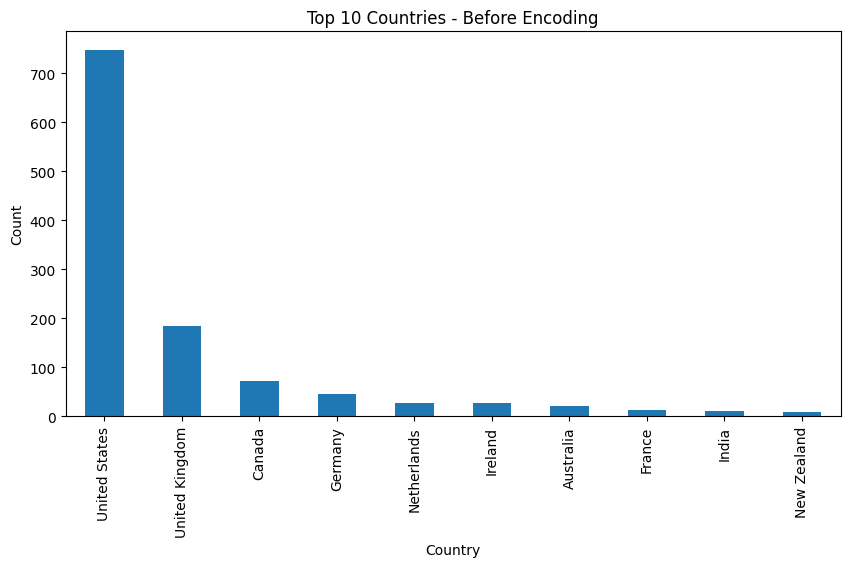

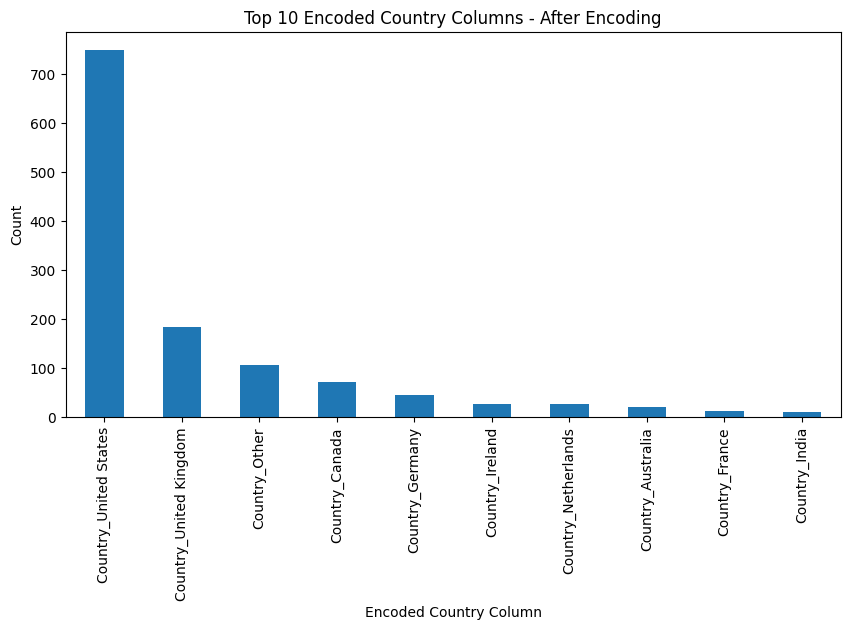

In [22]:
import matplotlib.pyplot as plt

#  visualize "Country" before encoding
plt.figure(figsize=(10,5))
df_original = pd.read_csv('/content/drive/MyDrive/KU-17_B01_Kandy_Uni/results/outputs/survey_scaled.csv')

df_original['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries - Before Encoding")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

# After encoding
country_cols = [c for c in df.columns if c.startswith("Country_")]

df[country_cols].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Encoded Country Columns - After Encoding")
plt.xlabel("Encoded Country Column")
plt.ylabel("Count")
plt.show()
